In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sys
import os

sns.set_style("whitegrid")

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)


from src.cleaner import DataCleaner
from src.eda import EDAProcessor

In [2]:
DATA_FILE_PATH = '../data/MachineLearningRating_v3.txt' 
DELIMITER = '|'


================= PIPELINE STARTED =================
Loading data from: ../data/MachineLearningRating_v3.txt
Data loaded successfully.

--- Sample Data ---
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr

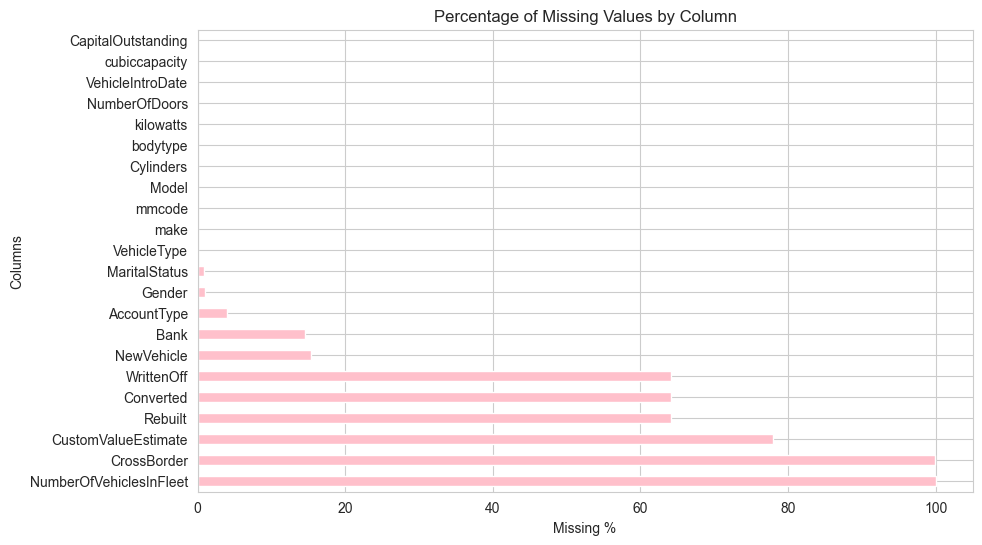


--- DATA TYPE CONVERSION ---
UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     Int64
make                                object
Model                   

In [3]:
data_cleaner = DataCleaner(DATA_FILE_PATH, DELIMITER)
df_cleaned= data_cleaner.process()

In [4]:
df_cleaned.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## Exploratory Data Analysis

In [5]:
eda_processor = EDAProcessor(df_cleaned)
eda_processor.descriptive_statistics()


--- Descriptive Statistics (Numeric Features) ---
                              count           mean           std  \
TotalPremium              1000098.0      61.905496  2.302845e+02   
TotalClaims               1000098.0      64.861190  2.384075e+03   
SumInsured                1000098.0  604172.732589  1.508332e+06   
CalculatedPremiumPerTerm  1000098.0     117.875691  3.997017e+02   

                                   min        25%          50%            75%  \
TotalPremium               -782.576754     0.0000     2.178333      21.929825   
TotalClaims              -12002.412281     0.0000     0.000000       0.000000   
SumInsured                    0.010000  5000.0000  7500.000000  250000.000000   
CalculatedPremiumPerTerm      0.000000     3.2248     8.436900      90.000000   

                                   max  CV (StdDev/Mean)  
TotalPremium              6.528260e+04          3.719936  
TotalClaims               3.930921e+05         36.756567  
SumInsured               

,count,mean,std,min,25%,50%,75%,max,CV (StdDev/Mean)
TotalPremium,1000098.0,61.905496,2.302845e+02,-782.576754,0.0000,2.178333,21.929825,6.528260e+04,3.719936
TotalClaims,1000098.0,64.861190,2.384075e+03,-12002.412281,0.0000,0.000000,0.000000,3.930921e+05,36.756567
SumInsured,1000098.0,604172.732589,1.508332e+06,0.010000,5000.0000,7500.000000,250000.000000,1.263620e+07,2.496524
CalculatedPremiumPerTerm,1000098.0,117.875691,3.997017e+02,0.000000,3.2248,8.436900,90.000000,7.442217e+04,3.390875


In [6]:
eda_processor.categorical_frequencies()


--- Top 10 for Citizenship ---
   895210 89.51%
ZA 103721 10.37%
ZW 936 0.09%
AF 231 0.02%

--- Top 10 for LegalType ---
Individual 911929 91.18%
Private company 83891 8.39%
Close Corporation 2459 0.25%
Public company 1295 0.13%
Partnership 331 0.03%
Sole proprieter 193 0.02%

--- Top 10 for Title ---
Mr 933555 93.35%
Mrs 45850 4.58%
Ms 13269 1.33%
Miss 6614 0.66%
Dr 810 0.08%

--- Top 10 for Language ---
English 1000098 100.00%

--- Top 10 for Bank ---
First National Bank 260811 26.08%
ABSA Bank 204954 20.49%
Standard Bank 181715 18.17%
nan 145961 14.59%
Nedbank 132003 13.20%
Capitec Bank 58155 5.81%
RMB Private Bank 12576 1.26%
Ithala Bank 1730 0.17%
Investec Bank 732 0.07%
Old Mutual 688 0.07%

--- Top 10 for AccountType ---
Current account 597938 59.79%
Savings account 358207 35.82%
nan 40232 4.02%
Transmission account 3721 0.37%

--- Top 10 for MaritalStatus ---
Not specified 986208 98.61%
nan 8259 0.83%
Single 4254 0.43%
Married 1377 0.14%

--- Top 10 for Gender ---
Not specifie

{'Citizenship': Citizenship
       895210
 ZA    103721
 ZW       936
 AF       231
 Name: count, dtype: int64,
 'LegalType': LegalType
 Individual           911929
 Private company       83891
 Close Corporation      2459
 Public company         1295
 Partnership             331
 Sole proprieter         193
 Name: count, dtype: int64,
 'Title': Title
 Mr      933555
 Mrs      45850
 Ms       13269
 Miss      6614
 Dr         810
 Name: count, dtype: int64,
 'Language': Language
 English    1000098
 Name: count, dtype: int64,
 'Bank': Bank
 First National Bank       260811
 ABSA Bank                 204954
 Standard Bank             181715
 NaN                       145961
 Nedbank                   132003
 Capitec Bank               58155
 RMB Private Bank           12576
 Ithala Bank                 1730
 Investec Bank                732
 Old Mutual                   688
 FirstRand Bank               638
 Mercantile Lisbon Bank       135
 Name: count, dtype: int64,
 'AccountType': Ac

In [7]:
# 1️⃣ Overall Loss Ratio
overall_lr = eda_processor.calculate_loss_ratio()
print(f"\nOverall Loss Ratio: {overall_lr:.4f}")

# 2️⃣ Loss Ratio by Province, VehicleType, Gender
group_cols = ['Province', 'VehicleType', 'Gender']

for col in group_cols:
    if col in eda_processor.df.columns:
        print(f"\nCalculating Loss Ratio by {col}...")
        lr_by_group = eda_processor.calculate_loss_ratio(group_col=col)



--- Overall Portfolio Loss Ratio: 1.0477 ---

Overall Loss Ratio: 1.0477

Calculating Loss Ratio by Province...

--- Loss Ratio by Province ---
                TotalClaims  TotalPremium  LossRatio
Province                                            
Gauteng        2.939415e+07  2.405377e+07   1.222018
KwaZulu-Natal  1.430138e+07  1.320908e+07   1.082693
Western Cape   1.038977e+07  9.806559e+06   1.059472
North West     5.920250e+06  7.490508e+06   0.790367
Mpumalanga     2.044675e+06  2.836292e+06   0.720897
Free State     3.549223e+05  5.213632e+05   0.680758
Limpopo        1.016477e+06  1.537324e+06   0.661199
Eastern Cape   1.356427e+06  2.140104e+06   0.633813
Northern Cape  8.949051e+04  3.165581e+05   0.282699

Calculating Loss Ratio by VehicleType...

--- Loss Ratio by VehicleType ---
                    TotalClaims  TotalPremium  LossRatio
VehicleType                                             
Heavy Commercial   7.504746e+05  4.609479e+05   1.628112
Medium Commercial  4.119

In [8]:
eda_processor.analyze_temporal_trends()

c:\Users\amare\Documents\KAIM\week-3\insurance_analytics\src\eda.py:134: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')



--- Monthly Temporal Trends (First 5 Months) ---
                  TotalPremium   TotalClaims  PolicyCount  ClaimFrequency  \
TransactionMonth                                                            
2013-10-31          371.063512      0.000000           45        0.000000   
2013-11-30        21307.467009  50585.078947         1196       42.295217   
2013-12-31        42484.748888   9283.385965         1495        6.209623   
2014-01-31        54085.196865  12436.859649         1827        6.807258   
2014-02-28        60788.436470  62989.307018         2062       30.547676   

                  ClaimSeverity  
TransactionMonth                 
2013-10-31             0.000000  
2013-11-30             2.374054  
2013-12-31             0.218511  
2014-01-31             0.229949  
2014-02-28             1.036205  


,TotalPremium,TotalClaims,PolicyCount,ClaimFrequency,ClaimSeverity
TransactionMonth,,,,,
2013-10-31,3.710635e+02,0.000000e+00,45,0.000000,0.000000
2013-11-30,2.130747e+04,5.058508e+04,1196,42.295217,2.374054
2013-12-31,4.248475e+04,9.283386e+03,1495,6.209623,0.218511
2014-01-31,5.408520e+04,1.243686e+04,1827,6.807258,0.229949
2014-02-28,6.078844e+04,6.298931e+04,2062,30.547676,1.036205
2014-03-31,9.857719e+04,3.227850e+05,3466,93.128973,3.274439
2014-04-30,2.342743e+05,3.068636e+05,6919,44.350859,1.309847
2014-05-31,3.759117e+05,5.180427e+05,9484,54.622811,1.378097
2014-06-30,4.862194e+05,5.045364e+05,11822,42.677753,1.037672


In [9]:
eda_processor.analyze_vehicle_claims()


--- Top 5 Vehicle Makes by Average Claims ---
Make
SUZUKI                                 419.634546
JMC                                    191.684795
HYUNDAI                                174.215195
MARCOPOLO                              156.794806
AUDI                                   137.843083
Name: TotalClaims, dtype: float64

--- Bottom 5 Vehicle Makes by Average Claims ---
Make
OPEL       0.0
RENAULT    0.0
SCANIA     0.0
TATA       0.0
VOLVO      0.0
Name: TotalClaims, dtype: float64


Make
SUZUKI                                 419.634546
JMC                                    191.684795
HYUNDAI                                174.215195
MARCOPOLO                              156.794806
AUDI                                   137.843083
POLARSUN                               134.044800
B.A.W                                  132.934016
FIAT                                   108.625642
BMW                                     90.558050
IVECO                                   89.667017
VOLKSWAGEN                              87.877091
GOLDEN JOURNEY                          86.197105
MERCEDES-BENZ                           76.191436
MERCEDES-BENZ                           70.069035
TOYOTA                                  63.626435
CMC                                     61.210485
MAZDA                                   49.392156
C.A.M                                   43.021964
NISSAN/DATSUN                           33.970579
JINBEI                                  32.85

In [10]:
eda_processor.calculate_correlations()


--- Correlation Matrix (Financial Features) ---
                          TotalPremium  TotalClaims  SumInsured  \
TotalPremium                  1.000000     0.121588   -0.041174   
TotalClaims                   0.121588     1.000000   -0.005129   
SumInsured                   -0.041174    -0.005129    1.000000   
CalculatedPremiumPerTerm      0.635987     0.079787   -0.032294   

                          CalculatedPremiumPerTerm  
TotalPremium                              0.635987  
TotalClaims                               0.079787  
SumInsured                               -0.032294  
CalculatedPremiumPerTerm                  1.000000  


,TotalPremium,TotalClaims,SumInsured,CalculatedPremiumPerTerm
TotalPremium,1.000000,0.121588,-0.041174,0.635987
TotalClaims,0.121588,1.000000,-0.005129,0.079787
SumInsured,-0.041174,-0.005129,1.000000,-0.032294
CalculatedPremiumPerTerm,0.635987,0.079787,-0.032294,1.000000


In [11]:
eda_processor.detect_outliers()


--- Outliers in TotalClaims (z-score > 3) ---
       TotalClaims
1560  46492.211754
1779  26516.859649
2601  25438.596491
3111  16715.000000
3220  74967.017544
3366  14867.500000
5291  16804.464912
6546  15262.605263
6662  72445.035088
7510  10282.745614


{'TotalClaims': 0          False
 1          False
 2          False
 3          False
 4          False
            ...  
 1000093    False
 1000094    False
 1000095    False
 1000096    False
 1000097    False
 Name: TotalClaims, Length: 1000098, dtype: bool}

In [12]:
for group_col in ['Province', 'PostalCode']:
    if group_col in eda_processor.df.columns:
        eda_processor.bivariate_group_summary(group_col, 'TotalPremium', 'TotalClaims')
        eda_processor.geographic_trends(group_col, 'TotalPremium')



--- Bivariate Summary: TotalClaims vs TotalPremium by Province ---
              TotalPremium TotalClaims                      
                      mean        mean           sum   count
Province                                                    
Eastern Cape     70.546672   44.713432  1.356427e+06   30336
Free State       64.373780   43.822975  3.549223e+05    8099
Gauteng          61.071115   74.630009  2.939415e+07  393865
KwaZulu-Natal    77.800695   84.234293  1.430138e+07  169781
Limpopo          61.899038   40.927553  1.016477e+06   24836
Mpumalanga       53.801205   38.785147  2.044675e+06   52718
North West       52.276258   41.317426  5.920250e+06  143287
Northern Cape    49.617253   14.026726  8.949051e+04    6380
Western Cape     57.416793   60.831482  1.038977e+07  170796

--- Geographic Trend: TotalPremium by Province ---
Province
KwaZulu-Natal    77.800695
Eastern Cape     70.546672
Free State       64.373780
Limpopo          61.899038
Gauteng          61.071115
West